In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Libraries used for liniar regression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# First read the surveys and store it in one large dataframe. 

df_2017 = pd.read_csv('2017 survey_results_public.csv', 
                      usecols =['Country',            # Where do you live
                                'EmploymentStatus',   # And only fulltime for good reference
                                'FormalEducation',    # Formal education 
                                'YearsCodedJob',      # Yeas coding experiance
                                'HaveWorkedLanguage', # Languages wored with
                                'Salary'              # Salary, converted to USD
                                ])

df_2017.rename(columns={ 'Country'            : 'Country',
                         'EmploymentStatus'   : 'Employment',
                         'FormalEducation'    : 'Education',
                         'YearsCodedJob'      : 'YearsCodedJob',
                         'HaveWorkedLanguage' : 'Languages',
                         'Salary'             : 'Salary'   
                       }, inplace=True)
df_2017['Year'] = 2017

df_2018 = pd.read_csv('2018 survey_results_public.csv', 
                      usecols =['Country',      # Where do you live
                                'Employment',   # And only fulltime for good reference
                                'FormalEducation', # Formal education 
                                'YearsCodingProf',  
                                'LanguageWorkedWith',  # Languages wored with
                                'ConvertedSalary'  # Salary, converted to USD
                                ])

df_2018.rename(columns={'Country'            : 'Country',
                        'Employment'         : 'Employment',
                        'FormalEducation'    : 'Education',
                        'YearsCodingProf'    : 'YearsCodedJob',
                        'LanguageWorkedWith' : 'Languages',
                        'ConvertedSalary'    : 'Salary'   
                   }, inplace=True)
df_2018['Year'] = 2018

df_2019 = pd.read_csv('2019 survey_results_public.csv', 
                      usecols =['Country', 
                                'Employment', 
                                'EdLevel', 
                                'YearsCodePro', 
                                'LanguageWorkedWith', 
                                'ConvertedComp'
                                ])

df_2019.rename(columns={'Country'            : 'Country',
                        'Employment'         : 'Employment',
                        'EdLevel'            : 'Education',
                        'YearsCodePro'       : 'YearsCodedJob',
                        'LanguageWorkedWith' : 'Languages',
                        'ConvertedComp'      : 'Salary'   
                       }, inplace=True)
df_2019['Year'] = 2019

df = pd.concat([df_2017,df_2018,df_2019],ignore_index=True)

# Delete the unused dataframes to free some memory
del df_2017
del df_2018
del df_2019

# As an extra, calculate the number of programming languages per entry
# Count the number of Programming Languages per entry
df['Number_of_languages'] = df['Languages'].str.split(';').str.len()

df.shape

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:60: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



(239130, 8)

| Translation | 2017 | 2018 | 2019 |
| --- | --- | --- |
|None|I never completed any formal education|I never completed any formal education|I never completed any formal education|
|Primary|Primary/elementary school|Primary/elementary school|Primary/elementary school|
|Secondary|Secondary school|Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)|Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)|
|Nachelor|Bachelor's degree|Bachelor’s degree (BA, BS, B.Eng., etc.)|Bachelor’s degree (BA, BS, B.Eng., etc.)|
|Master|Master's degree|Master’s degree (MA, MS, M.Eng., MBA, etc.)|Master’s degree (MA, MS, M.Eng., MBA, etc.)|
|Professional|Professional degree|Professional degree (JD, MD, etc.)|Professional degree (JD, MD, etc.)|
|Doctoral|Doctoral degree|Other doctoral degree (Ph.D, Ed.D., etc.)|Other doctoral degree (Ph.D, Ed.D., etc.)|
|Associate||Associate degree|Associate degree|
|Non finished|Some college/university study without earning a bachelor's degree|Some college/university study without earning a degree|Some college/university study without earning a degree|
|NaN|I prefer not to answer|||


In [3]:
DictionaryEducation = {'Associate degree'                       : 'Associate' ,
                       'I never completed any formal education' : 'None',
                       'Doctoral degree'                        :  'Doctoral' ,
                       'Primary/elementary school'              : 'Primary',
                       'Secondary school'                       : 'Secondary',
                       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)' :  'Secondary',
                       'Bachelor\'s degree'                     : 'Bachelor' ,
                       'Bachelor’s degree (BA, BS, B.Eng., etc.)' : 'Bachelor',
                       'Master\'s degree'           : 'Master',
                       'Master’s degree (MA, MS, M.Eng., MBA, etc.)' : 'Master',
                       'Professional degree'        : 'Professional' ,
                       'Professional degree (JD, MD, etc.)' : 'Professional' ,
                       'Other doctoral degree (Ph.D, Ed.D., etc.)' : 'Doctoral' ,
                       'Some college/university study without earning a bachelor\'s degree' : 'Non finished',
                       'Some college/university study without earning a degree' :  'Non finished',
                       'I prefer not to answer' : np.nan      # Not answering is actualy the same as NaN
                      }


df["Education"].replace(DictionaryEducation, inplace=True)


In [4]:
DictionaryYearsJob = { 'Less than a year' : '00-02 years' ,
                       '1 to 2 years' : '00-02 years',
                       '2 to 3 years' : '00-02 years',
                       '3 to 4 years' : '03-05 years',
                       '4 to 5 years' : '03-05 years',
                       '5 to 6 years' : '03-05 years',
                       '6 to 7 years' : '06-08 years',
                       '7 to 8 years' : '06-08 years',
                       '8 to 9 years' : '06-08 years',
                       '9 to 10 years' : '09-11 years',
                       '10 to 11 years' : '09-11 years',
                       '11 to 12 years' : '09-11 years',
                       '12 to 13 years' : '12-14 years',
                       '13 to 14 years' : '12-14 years',
                       '14 to 15 years' : '12-14 years',
                       '15 to 16 years' : '15-17 years',
                       '16 to 17 years' : '15-17 years',
                       '17 to 18 years' : '15-17 years',
                       '18 to 19 years' : '18-20 years',
                       '19 to 20 years' : '18-20 years',
                       '21-23 years' : '20 or more years',
                       '24-26 years' : '20 or more years',
                       '27-29 years' : '20 or more years',
                       '30 or more years' : '20 or more years',
                       'Less than 1 year': '00-02 years',
                       '1' : '00-02 years', '2' : '00-02 years',
                       '3' : '03-05 years', '4' : '03-05 years', '5' : '03-05 years',
                       '6' : '06-08 years', '7' : '06-08 years', '8' : '06-08 years',
                       '9': '09-11 years', '10': '09-11 years',
                       '11': '09-11 years',
                       '12' : '12-14 years',
                       '13' : '12-14 years',
                       '14' : '12-14 years',
                       '15' : '15-17 years',
                       '16' : '15-17 years',
                       '17' : '15-17 years',
                       '18' : '18-20 years',
                       '19' : '18-20 years',
                       '0-2 years' : '00-02 years', 
                       '3-5 years' : '03-05 years' ,
                       '6-8 years' : '06-08 years' ,
                       '9-11 years' : '09-11 years' ,
                       'More than 50 years' : '20 or more years',
                      
                    }

df["YearsCodedJob"].replace(DictionaryYearsJob, inplace=True)

#And all values from 20 are one catagory
df.loc[ pd.to_numeric(df['YearsCodedJob'], errors='coerce')>=20, "YearsCodedJob"] =  '20 or more years'

df

,Country,Education,Employment,Languages,Salary,Year,YearsCodedJob,Number_of_languages
0,United States,Secondary,"Not employed, and not looking for work",Swift,NaN,2017,NaN,1.0
1,United Kingdom,Non finished,Employed part-time,JavaScript; Python; Ruby; SQL,NaN,2017,NaN,4.0
2,United Kingdom,Bachelor,Employed full-time,Java; PHP; Python,113750.0,2017,20 or more years,3.0
3,United States,Doctoral,Employed full-time,Matlab; Python; R; SQL,NaN,2017,09-11 years,4.0
4,Switzerland,Master,Employed full-time,NaN,NaN,2017,09-11 years,NaN
5,New Zealand,Secondary,"Not employed, and not looking for work",JavaScript; PHP; Rust,NaN,2017,NaN,3.0
6,United States,Master,Employed full-time,Matlab; Python,NaN,2017,06-08 years,2.0
7,Poland,Master,Employed full-time,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,NaN,2017,06-08 years,8.0
8,Colombia,Bachelor,Employed full-time,C#; JavaScript,NaN,2017,06-08 years,2.0
9,France,Master,"Independent contractor, freelancer, or self-em...",Objective-C; Swift,NaN,2017,06-08 years,2.0


In [5]:
df_table = df.pivot_table( index='YearsCodedJob', columns='Year', aggfunc=len, fill_value=1, values ='Country').reset_index()
df_table.index=df_table['YearsCodedJob']
df_table['2017_perc'] = (df_table[2017]/df_table[2017].sum())*100
df_table['2018_perc'] = (df_table[2018]/df_table[2018].sum())*100
df_table['2019_perc'] = (df_table[2019]/df_table[2019].sum())*100

df_table

Year,YearsCodedJob,2017,2018,2019,2017_perc,2018_perc,2019_perc
YearsCodedJob,,,,,,,
00-02 years,00-02 years,13090,23421,16405,32.012717,30.064311,22.070200
03-05 years,03-05 years,10398,21362,20515,25.429200,27.421280,27.599521
06-08 years,06-08 years,4837,11385,11629,11.829298,14.614328,15.644886
09-11 years,09-11 years,4472,7573,8009,10.936659,9.721063,10.774778
12-14 years,12-14 years,2112,4287,4750,5.165077,5.502997,6.390335
15-17 years,15-17 years,2084,3012,3541,5.096601,3.866347,4.763827
18-20 years,18-20 years,830,2830,1942,2.029836,3.632723,2.612638
20 or more years,20 or more years,3067,4033,7540,7.500611,5.176951,10.143816


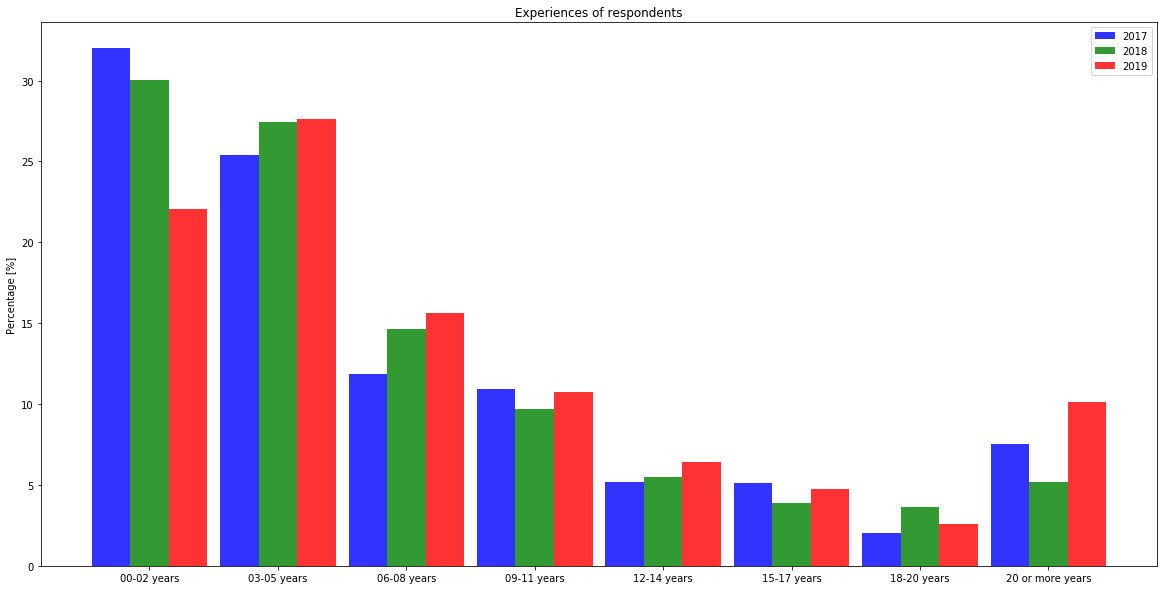

In [6]:
fig, ax = plt.subplots(figsize=(20,10))

bar_width = 0.3
opacity = 0.8
index = np.arange(df_table.shape[0])

rects1 = plt.bar(index - bar_width, df_table['2017_perc'], bar_width,
alpha=opacity,
color='b',
label='2017')

rects1 = plt.bar(index , df_table['2018_perc'], bar_width,
alpha=opacity,
color='g',
label='2018')

rects1 = plt.bar(index + bar_width, df_table['2019_perc'], bar_width,
alpha=opacity,
color='r',
label='2019')

plt.xticks(index, df_table['YearsCodedJob'])
plt.ylabel('Percentage [%]')
plt.title('Experiences of respondents')
plt.legend()
plt.show()

In [7]:
# The country names are not in all years the same. So we correct that first
DictionaryCountry = {'Iran, Islamic Republic of...':'Iran' ,
                     'Vietnam': 'Viet Nam',
                     'I prefer not to say' : np.nan ,
                     'Other Country (Not Listed Above)' : 'Other',
                     'Venezuela, Bolivarian Republic of...' : 'Venezuela',
                     'Hong Kong (S.A.R.)' : 'Hong Kong',
                     'The former Yugoslav Republic of Macedonia' : 'Macedonia',
                     'Bosnia-Herzegovina' : 'Bosnia and Herzegovina',
                     'Republic of Korea' : 'South Korea',
                     'Slovak Republic' : 'Slovakia',
                     'Azerbaidjan' : 'Azerbaijan',
                     'Libyan Arab Jamahiriya' : 'Libya',
                     'Republic of Moldova' : 'Moldavia',
                     'Syrian Arab Republic' : 'Syria',
                     'United Republic of Tanzania' : 'Tanzania'
                    }

df["Country"].replace(DictionaryCountry, inplace=True)

# And make now a table from all countries
df_table2 = df.pivot_table( index='Country', columns='Year', aggfunc=len, fill_value=0, values ='YearsCodedJob').reset_index()

df_table2['Total'] = df_table2[2017]+df_table2[2018]+df_table2[2019]
df_table2['2017_perc'] = (df_table2[2017]/df_table2[2017].sum())*100
df_table2['2018_perc'] = (df_table2[2018]/df_table2[2018].sum())*100
df_table2['2019_perc'] = (df_table2[2019]/df_table2[2019].sum())*100
df_table2 = df_table2.sort_values('Total', ascending=False)

# Increase the number of rows displayed, to see all countries
pd.set_option('display.max_rows', 500)
df_table2

Year,Country,2017,2018,2019,Total,2017_perc,2018_perc,2019_perc
216,United States,11455,20309,20949,52713,22.350347,20.630212,23.604241
92,India,5197,13721,9061,27979,10.140092,13.938015,10.209462
76,Germany,4143,6459,5866,16468,8.083587,6.561157,6.609503
215,United Kingdom,4395,6221,5737,16353,8.575275,6.319393,6.464153
38,Canada,2233,3393,3395,9021,4.356903,3.446665,3.825309
71,France,1740,2572,2391,6703,3.394989,2.612679,2.694054
169,Russian Federation,873,2869,1694,5436,1.703348,2.914377,1.908711
162,Poland,1290,2122,1922,5334,2.516975,2.155562,2.165609
30,Brazil,777,2505,1948,5230,1.516038,2.544620,2.194905
13,Australia,913,2018,1903,4834,1.781394,2.049917,2.144201


In [8]:
# Now make a dataframe for the linear regression
# Drop all entries without a salary

df2 = df.dropna(subset=['Salary'], axis=0)

# there are 228 countries, too much for linear regression. So we limmit the countries to where there at least 1000 responses in all three years
df2.loc[df2['Country'].isin(df_table2['Country'][df_table2['Total']<500]), 'Country'] = 'Other'      

print ("And now we reduces it to %s countries" % df2['Country'].unique().shape[0] )

And now we reduces it to 62 countries


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
PopularLanguages = [ 'JavaScript', 'SQL', 'HTML', 'Java', 'Python', 'C#', 'Bash/Shell', 'PHP', 'C++', 'C' ]

for col in PopularLanguages :
    df2['Lang_'+col.replace('+', 'p')] = 0
    df2['Lang_'+col.replace('+', 'p')][df2['Languages'].str.contains(col,regex =False, na=False)] = 1
df2 = df2.drop('Languages', axis=1)

# Fill the NaN values from Number_of_languages with the mode 
df2['Number_of_languages'] = df2['Number_of_languages'].fillna(df2['Number_of_languages'].mode()[0])


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A

In [10]:
#Make 
for col in ['YearsCodedJob', 'Education', 'Employment', 'Country'] :
    try :
        df2 = pd.concat( [ df2.drop(col, axis=1), 
                      pd.get_dummies( df2[col], 
                                      prefix=col, 
                                      prefix_sep='_', 
                                      drop_first=True, 
                                      dummy_na=False)], axis=1)
    except :
        pass
    
# Split data in 
X = df2.drop('Salary', axis=1)
y = df2['Salary']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print ( test_score, train_score)

0.09045302128228105 0.09379247013831038


In [11]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df


coef_df = coef_weights(lm_model.coef_, X_train)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

coef_df

,est_int,coefs,abs_coefs
31,Employment_Retired,167734.325,167734.325
56,Country_Ireland,139049.333,139049.333
90,Country_United States,135755.759,135755.759
81,Country_South Korea,108012.353,108012.353
68,Country_Norway,99087.370,99087.370
85,Country_Switzerland,98639.834,98639.834
32,Country_Australia,78838.717,78838.717
89,Country_United Kingdom,74088.778,74088.778
66,Country_New Zealand,65301.450,65301.450
23,Education_None,60014.162,60014.162


In [12]:
table=coef_df[coef_df['est_int'].str.startswith('Employment')].sort_values('coefs', ascending=False)
table['est_int'] = table['est_int'].str[11:]
table=table.rename(columns = {'est_int':'Employment'})
table[['Employment','coefs']]

,Employment,coefs
31,Retired,167734.325
28,"Independent contractor, freelancer, or self-em...",2843.213
30,"Not employed, but looking for work",-21727.563
27,Employed part-time,-38731.840
29,"Not employed, and not looking for work",-43656.628


In [13]:
table=coef_df[coef_df['est_int'].str.startswith('YearsCoded')].sort_values('coefs', ascending=False)
table['est_int'] = table['est_int'].str[14:]
table=table.rename(columns = {'est_int':'Experiance'})
table[['Experiance','coefs']]

,Experiance,coefs
18,20 or more years,53142.960
17,18-20 years,45876.800
15,12-14 years,40242.836
16,15-17 years,32144.851
14,09-11 years,31040.418
13,06-08 years,29938.926
12,03-05 years,14220.831


In [14]:
table = coef_df[coef_df['est_int'].str.startswith('Lang_')].sort_values('coefs', ascending=False)
table['est_int'] = table['est_int'].str[5:]
table=table.rename(columns = {'est_int':'Language'})
table[['Language','coefs']]

,Language,coefs
5,Java,4404.531
8,Bash/Shell,3556.622
6,Python,-471.980
2,JavaScript,-695.208
3,SQL,-2051.566
10,Cpp,-2312.253
11,C,-3324.236
4,HTML,-4169.117
7,C#,-8111.876
9,PHP,-12662.830


In [15]:
table = coef_df[coef_df['est_int'].str.startswith('Country_')].sort_values('coefs', ascending=False)
table['est_int'] = table['est_int'].str[8:]
table=table.rename(columns = {'est_int':'Country'})
table[['Country','coefs']]

,Country,coefs
56,Ireland,139049.333
90,United States,135755.759
81,South Korea,108012.353
68,Norway,99087.370
85,Switzerland,98639.834
32,Australia,78838.717
89,United Kingdom,74088.778
66,New Zealand,65301.450
45,Denmark,53917.998
77,Singapore,48469.226


In [16]:
coef_df[coef_df['est_int'].isin(['Year', 'Number_of_languages'])].sort_values('coefs', ascending=False)

,est_int,coefs,abs_coefs
0,Year,34258.087,34258.087
1,Number_of_languages,3140.164,3140.164
